In [1]:
import importlib
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from atmacup_18 import constants

import utils

importlib.reload(utils)

<module 'utils' from '/home/tatsuya/projects/atmacup/atmacup_18/experiments/main2/v00/v00_01_01/utils.py'>

In [2]:
RANDOM_STATE = 2024

## データ読み込み

In [3]:
notebook_dir = Path().resolve()
DATA_DIR = notebook_dir.parents[3].joinpath("data")
DATASET_DIR = DATA_DIR.joinpath("atmaCup#18_dataset")
TR_FEATURES_CSV = DATASET_DIR.joinpath("train_features.csv")
TS_FEATURES_CSV = DATASET_DIR.joinpath("test_features.csv")
IMAGES_DIR = DATASET_DIR.joinpath("images")
TRAFFIC_LIGHTS_CSV = DATASET_DIR.joinpath("traffic_lights.csv")

IMAGE_NAMES = ["image_t.png", "image_t-0.5.png", "image_t-1.0.png"]
TRAFFIC_LIGHTS_BBOX_IMAGE_NAME = constants.TRAFFIC_LIGHT_BBOX_IMAGE_NAME

In [4]:
tr_df = utils.read_feature_csv(TR_FEATURES_CSV)
tr_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec,origin_idx
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i32,i64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…",320,0
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…",420,1


In [5]:
ts_df = utils.read_feature_csv(TS_FEATURES_CSV)
ts_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,scene_id,scene_dsec,origin_idx
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,str,i32,i64
"""012baccc145d400c896cb82065a93d…",3.374273,-0.01936,-34.008415,17.0,0.0,false,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…",120,0
"""012baccc145d400c896cb82065a93d…",2.441048,-0.022754,307.860077,295.0,0.0,true,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…",220,1


## scene_dsec順に並び替える

In [6]:
tr_df = tr_df.sort(["scene_id", "scene_dsec"])
ts_df = ts_df.sort(["scene_id", "scene_dsec"])

## Target

In [7]:
target = utils.CoordinateTarget(prefix="tg_")
target.fit(tr_df)

tg_df = target.transform(tr_df)
print(tg_df.columns)
print(tg_df.describe().glimpse())
tr_df = pl.concat([tr_df, tg_df], how="horizontal")

['tg_cood_x_0', 'tg_cood_y_0', 'tg_cood_z_0', 'tg_cood_x_1', 'tg_cood_y_1', 'tg_cood_z_1', 'tg_cood_x_2', 'tg_cood_y_2', 'tg_cood_z_2', 'tg_cood_x_3', 'tg_cood_y_3', 'tg_cood_z_3', 'tg_cood_x_4', 'tg_cood_y_4', 'tg_cood_z_4', 'tg_cood_x_5', 'tg_cood_y_5', 'tg_cood_z_5']
Rows: 9
Columns: 19
$ statistic   <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ tg_cood_x_0 <f64> 43371.0, 0.0, 4.122443942757371, 3.2667167639213908, -1.7321542071537557, 1.116530690565041, 3.843337458989432, 6.4281197924248215, 12.392587231992154
$ tg_cood_y_0 <f64> 43371.0, 0.0, 0.0019486856369589753, 0.11686590022408185, -2.5341378248203235, -0.02646308932096216, 0.0010884804706597444, 0.030664179622664968, 3.4595563267615925
$ tg_cood_z_0 <f64> 43371.0, 0.0, 0.001247332026343412, 0.040745039147660006, -0.9965478318668152, -0.017624552286421614, 0.0011112325970167394, 0.01959056385186172, 1.4479292511292303
$ tg_cood_x_1 <f64> 43371.0, 0.0, 8.694386412319787, 6.894354638218222, -3.1

## 特徴量

In [8]:
feature = utils.FeatureRidge(prefix="ft_")
feature.fit(tr_df)

ft_df = feature.transform(tr_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
tr_df = pl.concat([tr_df, ft_df], how="horizontal")

ft_df = feature.transform(ts_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
ts_df = pl.concat([ts_df, ft_df], how="horizontal")

['ft_vEgo']
Rows: 9
Columns: 2
$ statistic <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ ft_vEgo   <f64> 43371.0, 0.0, 9.172175823216334, 7.226919878374694, -0.1619189828634262, 2.5786657333374023, 8.518790245056152, 14.286815643310547, 27.55126190185547

None
['ft_vEgo']
Rows: 9
Columns: 2
$ statistic <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ ft_vEgo   <f64> 1727.0, 0.0, 9.498940069707334, 7.23556621771096, -0.16705937683582306, 2.988953113555908, 9.076517105102539, 14.758581161499025, 27.206621170043945

None


## モデリング

In [9]:
N_SPLITS = 5

In [10]:
model_params = {
    "ridge": {
        "alpha": 0.1,
        "random_state": RANDOM_STATE,
    }
}

fit_params = {}

In [11]:
models, oof_preds = utils.train(
    model_class=utils.RidgeModel,
    model_params=model_params,
    fit_params=fit_params,
    df=tr_df,
    target_cols=target.columns,
    feature_cols=feature.columns,
    group_col="scene_id",
    n_splits=N_SPLITS,
)

-----------------
-----------------
Training fold 0...
train samples: 34696, valid samples: 8675
-----------------
-----------------
Training fold 1...
train samples: 34697, valid samples: 8674
-----------------
-----------------
Training fold 2...
train samples: 34697, valid samples: 8674
-----------------
-----------------
Training fold 3...
train samples: 34697, valid samples: 8674
-----------------
-----------------
Training fold 4...
train samples: 34697, valid samples: 8674


In [12]:
# utils.plot_lgb_importance(
#    sum([model.models for model in models], []), models[0].feature_names
# )

In [13]:
oof_preds = oof_preds.select(pl.all().name.prefix("pred_"))
pred_cols = oof_preds.columns

tr_df = pl.concat([tr_df, oof_preds], how="horizontal")
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec,origin_idx,tg_cood_x_0,tg_cood_y_0,tg_cood_z_0,tg_cood_x_1,tg_cood_y_1,tg_cood_z_1,tg_cood_x_2,tg_cood_y_2,tg_cood_z_2,tg_cood_x_3,tg_cood_y_3,tg_cood_z_3,tg_cood_x_4,tg_cood_y_4,tg_cood_z_4,tg_cood_x_5,tg_cood_y_5,tg_cood_z_5,ft_vEgo,pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…",320,0,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,5.701526,2.554011,0.00168,0.000258,5.385855,0.001973,0.000934,8.210258,0.000216,0.001905,11.025179,-0.003248,0.002993,13.831204,-0.00852,0.003889,16.628094,-0.015083,0.00473
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…",420,1,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,11.176292,5.027666,0.001907,0.00194,10.604269,0.004494,0.003918,16.16689,0.007127,0.00581,21.710561,0.010025,0.007402,27.233587,0.013468,0.00844,32.733645,0.017639,0.009267
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889,"""00066be8e20318869c38c66be46663…",520,2,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889,10.472548,4.709695,0.001878,0.001724,9.933477,0.00417,0.003534,15.144119,0.006239,0.005308,20.337028,0.008319,0.006835,25.510802,0.010642,0.007855,30.663386,0.013433,0.008684
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.013725,6.113567,-0.239161,-0.012887,8.770783,-0.381813,-0.003898,11.619313,-0.554488,0.011393,14.657048,-0.7788,0.044243,"""000fb056f97572d384bae4f5fc1e0f…",20,4,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.013725,6.113567,-0.239161,-0.012887,8.770783,-0.381813,-0.003898,11.619313,-0.554488,0.011393,14.657048,-0.7788,0.044243,3.316744,1.476795,0.001258,-0.000295,3.113526,0.00106,-0.000071,4.747103,-0.001362,0.000647,6.376009,-0.005859,0.001548,8.002085,-0.013407,0.00236,9.626345,-0.023225,0.003125
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754,"""000fb056f97572d384ba

## 評価

In [14]:
def calc_score(df: pl.DataFrame, pred_cols: list[str]):
    tg_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    tg = df.select(tg_cols).to_numpy()
    pred = df.select(pred_cols).to_numpy()

    scores = np.abs(tg - pred).mean(axis=0)
    scores = {f"score_{col}": float(score) for col, score in zip(pred_cols, scores)}
    scores["avg"] = float(np.abs(tg - pred).mean())
    return scores


scores = calc_score(tr_df, pred_cols)
scores

{'score_pred_tg_cood_x_0': 0.06985193871254555,
 'score_pred_tg_cood_y_0': 0.059673809699244594,
 'score_pred_tg_cood_z_0': 0.026357269001052116,
 'score_pred_tg_cood_x_1': 0.20600639890097266,
 'score_pred_tg_cood_y_1': 0.16775758961353535,
 'score_pred_tg_cood_z_1': 0.055065163775621644,
 'score_pred_tg_cood_x_2': 0.4342445688749895,
 'score_pred_tg_cood_y_2': 0.32318261124802006,
 'score_pred_tg_cood_z_2': 0.08525862443651516,
 'score_pred_tg_cood_x_3': 0.7539150053142144,
 'score_pred_tg_cood_y_3': 0.5251679227867013,
 'score_pred_tg_cood_z_3': 0.1170065268321333,
 'score_pred_tg_cood_x_4': 1.1593826520126873,
 'score_pred_tg_cood_y_4': 0.7720409880364887,
 'score_pred_tg_cood_z_4': 0.15019659349448536,
 'score_pred_tg_cood_x_5': 1.6472033156452426,
 'score_pred_tg_cood_y_5': 1.0624220893315148,
 'score_pred_tg_cood_z_5': 0.18496452548102105,
 'avg': 0.4333165329553882}

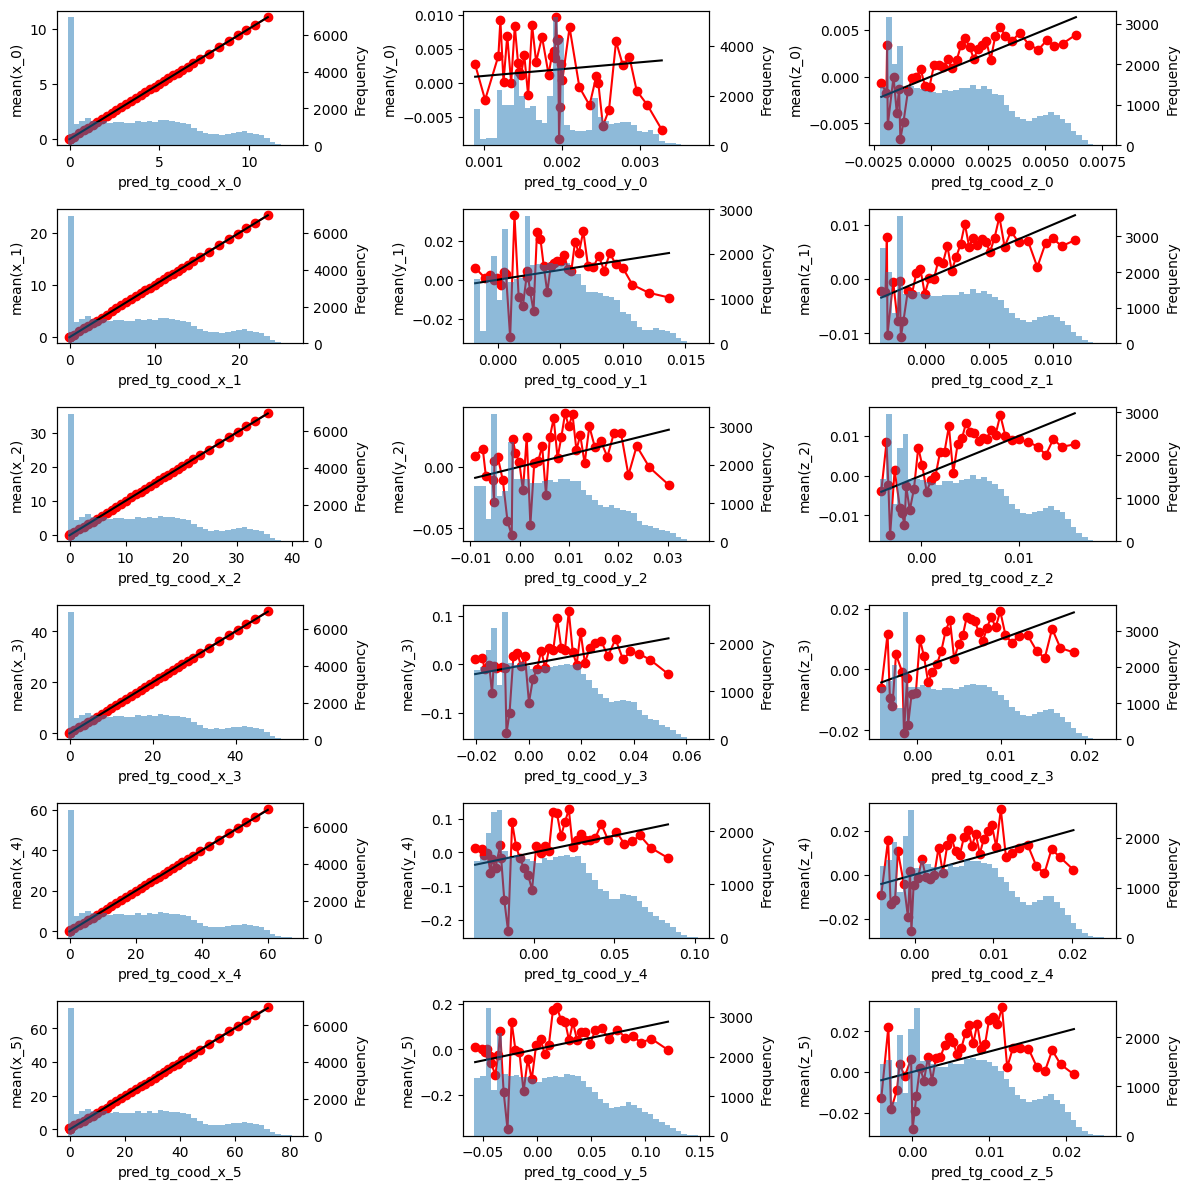

In [15]:
utils.plot_calibration_curve(tr_df, pred_cols, n_bins=40)

## oofを保存

In [16]:
def create_submission_csv(preds: pl.DataFrame, filename: str = "submission.csv"):
    submission_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    # validate preds columns
    if len(preds.columns) != len(submission_cols):
        raise ValueError(
            f"preds columns must be {len(submission_cols)}, but got {len(preds.columns)}"
        )

    preds.columns = submission_cols
    preds.write_csv(filename)
    print(f"Submission file is created: {filename}")


# 元の順番に戻して保存
create_submission_csv(tr_df.sort("origin_idx").select(pred_cols), "oof_preds.csv")

Submission file is created: oof_preds.csv


## Submission

In [17]:
preds = utils.predict(
    models,
    ts_df,
    feature.columns,
    pred_cols=pred_cols,
)
preds

pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.503259,0.001723,-0.00066,3.168892,0.001655,-0.000767,4.830736,-0.001044,-0.000391,6.487316,-0.006149,0.000235,8.140523,-0.014078,0.000796,9.791165,-0.024293,0.001372
1.081677,0.001686,-0.000967,2.279513,0.001202,-0.001311,3.474754,-0.002299,-0.001094,4.666341,-0.008585,-0.000567,5.856566,-0.018137,-0.000043,7.046578,-0.030382,0.000523
1.607106,0.001732,-0.000584,3.38797,0.001767,-0.000632,5.164751,-0.000735,-0.000218,6.935871,-0.005549,0.000433,8.703123,-0.013079,0.001003,10.467231,-0.022793,0.001581
0.904526,0.001671,-0.001096,1.905791,0.001011,-0.00154,2.904964,-0.002826,-0.00139,3.901158,-0.009609,-0.000904,4.896835,-0.019843,-0.000396,5.893289,-0.03294,0.000166
0.973474,0.001677,-0.001046,2.051246,0.001086,-0.001451,3.126731,-0.002621,-0.001275,4.198974,-0.00921,-0.000773,5.27037,-0.019179,-0.000258,6.342159,-0.031944,0.000305
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6.54234,0.002156,0.003008,13.799453,0.007076,0.005741,21.038494,0.01395,0.008015,28.253036,0.02297,0.009825,35.440176,0.034434,0.010824,42.596623,0.048482,0.011514
6.976404,0.002193,0.003324,14.715166,0.007542,0.006302,22.434623,0.015242,0.008739,30.127927,0.025479,0.010651,37.791757,0.038613,0.011688,45.422473,0.054751,0.012388
7.419612,0.002231,0.003646,15.650166,0.008019,0.006874,23.86016,0.016561,0.009479,32.042309,0.02804,0.011494,40.192871,0.04288,0.01257,48.307844,0.061152,0.01328


In [18]:
# 元の順番に戻す
preds = (
    preds.with_columns(ts_df.get_column("origin_idx"))
    .sort("origin_idx")
    .drop("origin_idx")
)

In [19]:
create_submission_csv(preds)

Submission file is created: submission.csv
